In [1]:
from nltk.corpus import PlaintextCorpusReader
import jieba
import re
import matplotlib.pyplot as plt

luxun = PlaintextCorpusReader(".", "Luxun.txt")
luxun_s = luxun.raw('Luxun.txt')
luxun_s = re.sub("[^\u4e00-\u9fa5]+", "", luxun_s)

luxun_s = jieba.lcut(luxun_s)
# luxun_s

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built successfully.


In [9]:
def Bigram(w1):
    w1 = re.sub("[^\u4e00-\u9fa5]+", "", w1)
    w1 = jieba.lcut(w1)
    Ps = 1
    for i in range(len(w1) - 1):
        count = luxun_s.count(f"{w1[i + 1]}")
        if count == 0:
            Ps = 0
            break
        Ps *= (find_count(luxun_s, w1[i + 1], w1[i]) + 1) / (float) (count + len(set(luxun_s)))
        print(f"{w1[i] + w1[i + 1]}: {find_count(luxun_s, w1[i + 1], w1[i])}  {w1[i +1]}: {count}  概率： {Ps}\n")
    print(f"========================> {Ps}")
    return Ps

def find_count(ls:list, w1, w2):
    count = 0
    for i in range(len(ls)):
        if w1 == ls[i] and w2 == ls[i-1]:
            count += 1
    return count

def find_countTri(ls:list, w1, w2, w3):
    count = 0
    for i in range(len(ls)):
        if w1 == ls[i] and w2 == ls[i-1] and w3 == ls[i-2]:
            count += 1
    return count

def trigram(w1):
    w1 = re.sub("[^\u4e00-\u9fa5]+", "", w1)
    w1 = jieba.lcut(w1)
    Ps = 1
    for i in range(len(w1) - 2):
        count = find_count(luxun_s, w1[i + 1], w1[i])
        if count == 0:
            Ps = 0
            break
        Ps *= (find_countTri(luxun_s, w1[i + 2], w1[i + 1], w1[i]) + 1) / (float) (count + len(set(luxun_s)))
        print(f"{w1[i + 1] + w1[i + 1] + w1[i]}: {find_countTri(luxun_s, w1[i + 2], w1[i + 1], w1[i])}  {w1[i +1] + w1[i]}: {count}  概率： {Ps}\n")
    print(f"========================> {Ps}")
    return Ps



========================> 0
便便从来如此: 1  便从来如此: 1  概率： 4.882931712200005e-05

对对便: 1  对便: 9  概率： 2.3838366061464128e-09

========================> 2.3838366061464128e-09
寄寄我: 1  寄我: 3  概率： 4.882693293620761e-05

你你寄: 1  你寄: 1  概率： 2.3841857924367106e-09

的的你: 1  的你: 92  概率： 1.161600873294378e-13

信信的: 1  信的: 15  概率： 5.6700796782973075e-18

总要总要信: 1  总要信: 1  概率： 2.7686611871858725e-22

送往送往总要: 1  送往总要: 1  概率： 1.351918351124721e-26

邮局邮局送往: 1  邮局送往: 1  概率： 6.601324989012042e-31

不不邮局: 1  不邮局: 1  概率： 3.2233819131385245e-35

喜欢喜欢不: 1  喜欢不: 9  概率： 1.573648015787597e-39

放在放在喜欢: 1  放在喜欢: 1  概率： 7.684015800129872e-44

街边街边放在: 1  街边放在: 1  概率： 3.7520524427500045e-48

的的街边: 1  的街边: 1  概率： 1.832101585854149e-52

绿色绿色的: 1  绿色的: 1  概率： 8.946026933539145e-57

邮筒邮筒绿色: 1  邮筒绿色: 1  概率： 4.368283861197366e-61

中中邮筒: 1  中邮筒: 1  概率： 2.13300317937321e-65

我我中: 1  我中: 8  概率： 1.041352916747161e-69

总总我: 3  总我: 15  概率： 1.0166235489196895e-73

疑心疑心总: 1  疑心总: 4  概率： 4.963739802351885e-78

那里那里疑心: 1  那里疑心: 1  概率： 2

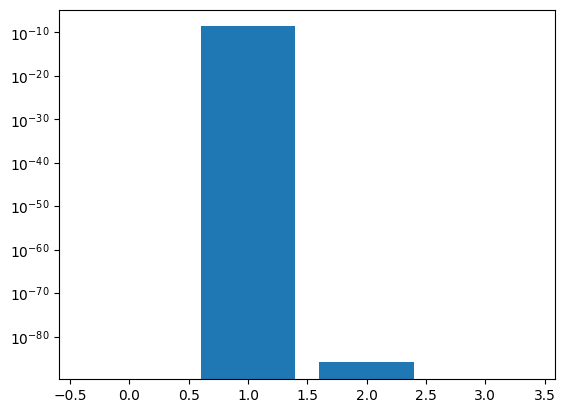

In [10]:
val = ["猛兽总是独行，牛羊才成群结队。",
"从来如此，便对么？",
"我寄你的信，总要送往邮局，不喜欢放在街边的绿色邮筒中，我总疑心那里会慢一点。",
"学医救不了中国人。"]

# print(len(set(luxun_s)))

# print(find_count(val_, "总是", "野兽"))

y = []
for item in val:
    y.append(trigram(item))
    

x = ['a', 'b', 'c', 'd']

plt.bar(range(len(y)), y, log=True)
plt.show()

In [ ]:
path = ""
file = ""

hp = PlaintextCorpusReader(path, file)
word_list = hp.words()

def train_bi_gram(word_list):
    bi_gram = {}
    for i in range(len(word_list)-1):
        current_word = word_list[i]
        next_word = word_list[i + 1]
        if current_word not in bi_gram:
            bi_gram[current_word] = {}
        if next_word not in bi_gram[current_word]:
            bi_gram[current_word][next_word] = 0
        bi_gram[current_word][next_word] += 1

    # 计算概率
    for word, next_word in bi_gram.items():
        total_count = sum(next_word.values())
        for next_word, count in next_word.items():
            bi_gram[word][next_word] = count / total_count

    return bi_gram

def print_bi_gram(bi_gram):
    pass

def calc_sent_prob(bi_gram, word_list):
    prob = 1.0
    for i in range(len(word_list) - 1):
        current_word = word_list[i]
        next_word = word_list[i + 1]
        if current_word in bi_gram and next_word in bi_gram[current_word]:
            prob *= bi_gram[current_word][next_word]
        else:
            prob = 0
            break
    return prob



# list_prob = [calc_sent_prob_bigram(bi_model, get_wordlist(sent)) for sent in list_text]


str_text = ""
word_list = str_text.split(' ') 